Alberto Diaz Durana
12.09.2025

In [89]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = [
    "age","workclass","fnlwgt","education","education-num","marital-status",
    "occupation","relationship","race","sex","capital-gain","capital-loss",
    "hours-per-week","native-country","income"
]

df = pd.read_csv(url, names=columns, na_values=" ?", sep=",\\s", engine="python")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


These is an error in transforming " ?" to missing values

In [90]:
# find rows where "?" was not transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,?,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [91]:
# read the data including a correction for "?"
df = pd.read_csv(url, names=columns, na_values="?", sep=",\s", engine="python")
df.head()

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\adiaz\AppData\Local\Temp\ipykernel_21728\1694155875.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(url, names=columns, na_values="?", sep=",\s", engine="python")


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [92]:
# did the fix work?
# find rows where "?" is transformed to NaN
df.iloc[25:31][["age", "workclass", "education", "income"]]

,age,workclass,education,income
25,56,Local-gov,Bachelors,>50K
26,19,Private,HS-grad,<=50K
27,54,NaN,Some-college,>50K
28,39,Private,HS-grad,<=50K
29,49,Private,HS-grad,<=50K
30,23,Local-gov,Assoc-acdm,<=50K


In [93]:
# Get list of column names
columns_list = df.columns.tolist()
columns_list

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [94]:
# find data types of each column
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

# Step 0. Split train and test to avoid data leakage

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split features (X) and target (y)
X = df.drop("income", axis=1)
y = df["income"]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (26048, 14) (26048,)
Test shape: (6513, 14) (6513,)


In [96]:
# Concatenate training features and target back into one DataFrame
train_df = pd.concat([X_train, y_train], axis=1)

In [97]:
df = train_df.copy()

# Step 1. Handling Missing Values
Identify which columns contain missing values.
Decide: should you drop rows/columns, or impute (fill in) the values?
If imputing, what strategy makes sense for numeric vs categorical features?

In [98]:
# Check missing nan values
df.isna().sum()

age                  0
workclass         1447
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1454
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     458
income               0
dtype: int64

In [99]:
# find the proportion of missing values in each column
df.isna().mean()

age               0.000000
workclass         0.055551
fnlwgt            0.000000
education         0.000000
education-num     0.000000
marital-status    0.000000
occupation        0.055820
relationship      0.000000
race              0.000000
sex               0.000000
capital-gain      0.000000
capital-loss      0.000000
hours-per-week    0.000000
native-country    0.017583
income            0.000000
dtype: float64

Since the missing values in workclass, occupation, and native-country are all categorical features annd account for les than 6% we will replace them with the mode for the sake of simplification.

In [100]:
# find rows in df with only missing values
df[df.isnull().all(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income


In [101]:
# handle missing values in categorical columns by replacing them with the mode
cat_cols = df.select_dtypes(include=['object']).copy().columns.tolist()
for col in cat_cols:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [102]:
# Verify no missing values remain
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

An alternative to handle categorical missing values would be to fill the missing values with a string like "N/A"

# Step 2. Handling Outliers
Explore the numeric features.
Use summary statistics and visualizations (e.g., histograms, boxplots) to detect extreme values.
Apply the IQR method or another method to set thresholds.
Decide: remove, cap, or transform outliers.

In [103]:
# Numeric columns in the dataset
num_cols = ["age", "fnlwgt", "education-num", "capital-gain", "capital-loss", "hours-per-week"]

# 1. Summary statistics
df[num_cols].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,26048.000000,2.604800e+04,26048.000000,26048.000000,26048.000000,26048.000000
mean,38.576513,1.897592e+05,10.080544,1053.617437,87.988828,40.388552
std,13.642904,1.052329e+05,2.575202,7230.800656,403.629787,12.331139
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.179630e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782635e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370065e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


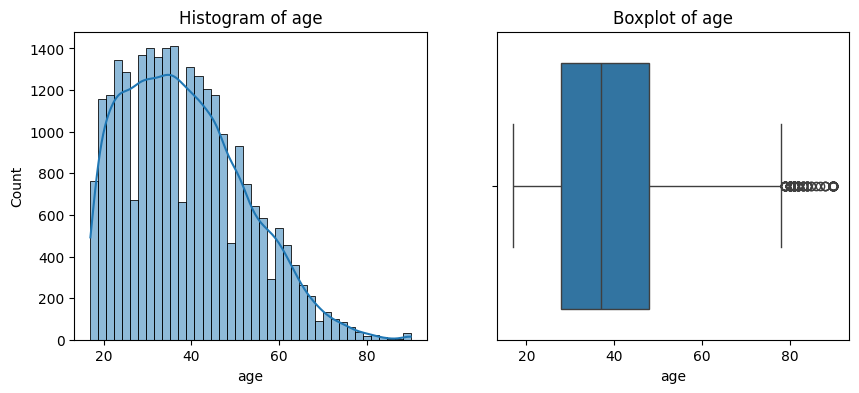

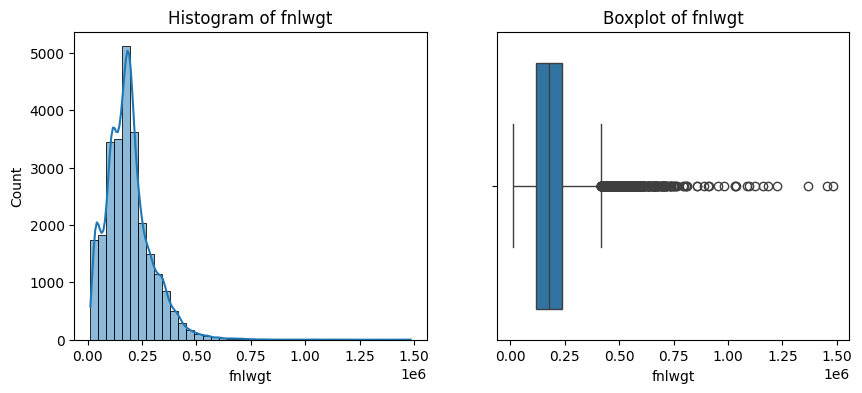

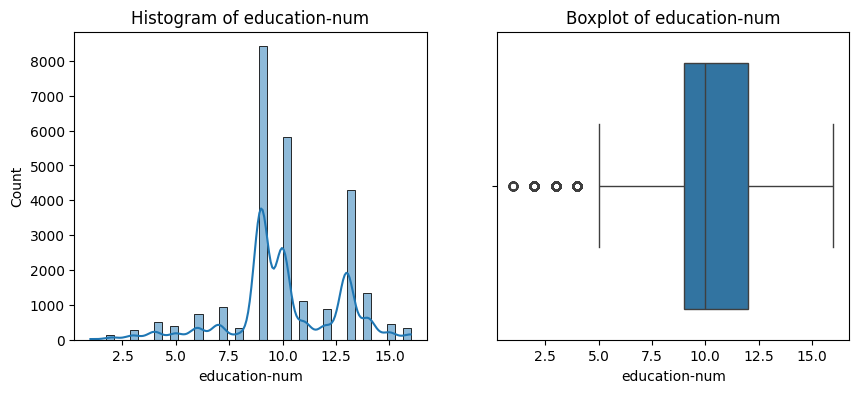

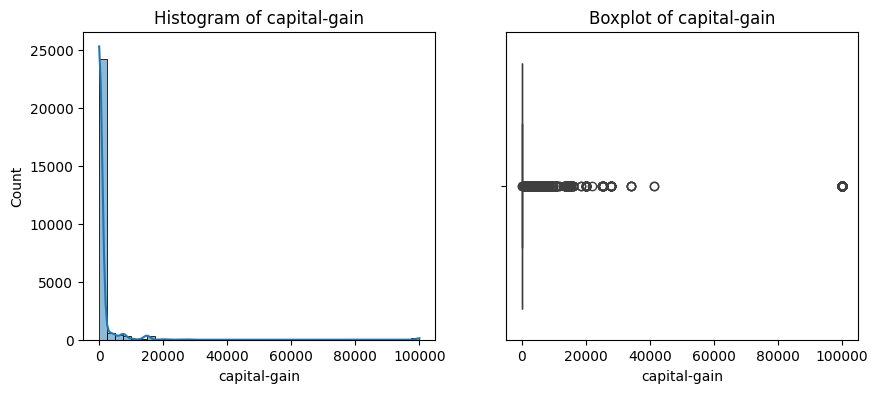

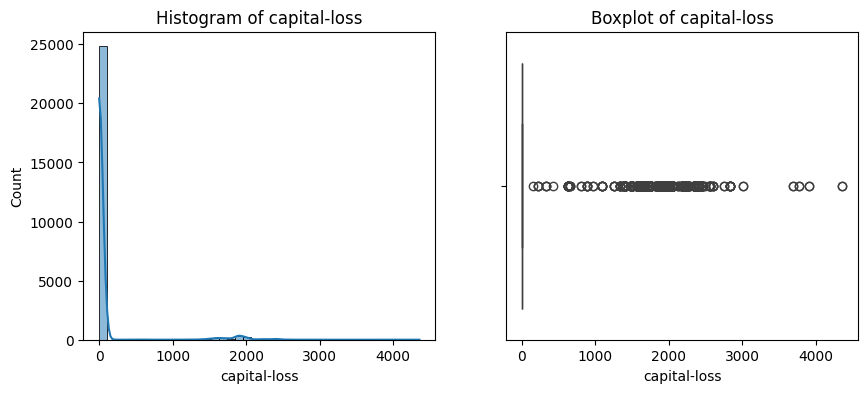

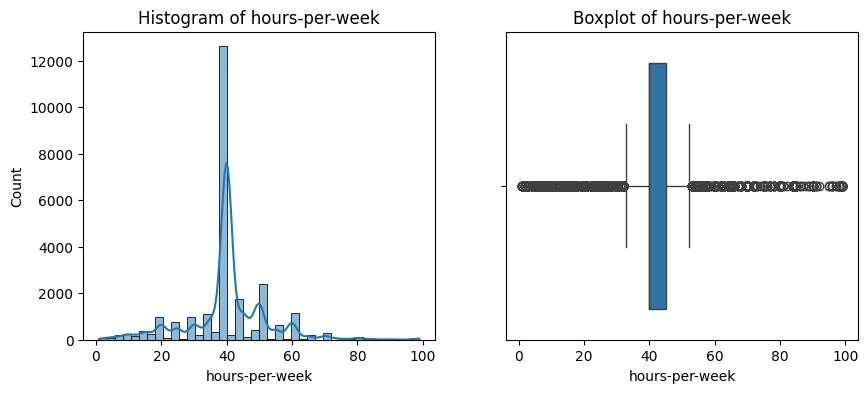

In [104]:
# 2. Visualize distributions

import matplotlib.pyplot as plt
import seaborn as sns
for col in num_cols:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Histogram of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.show()

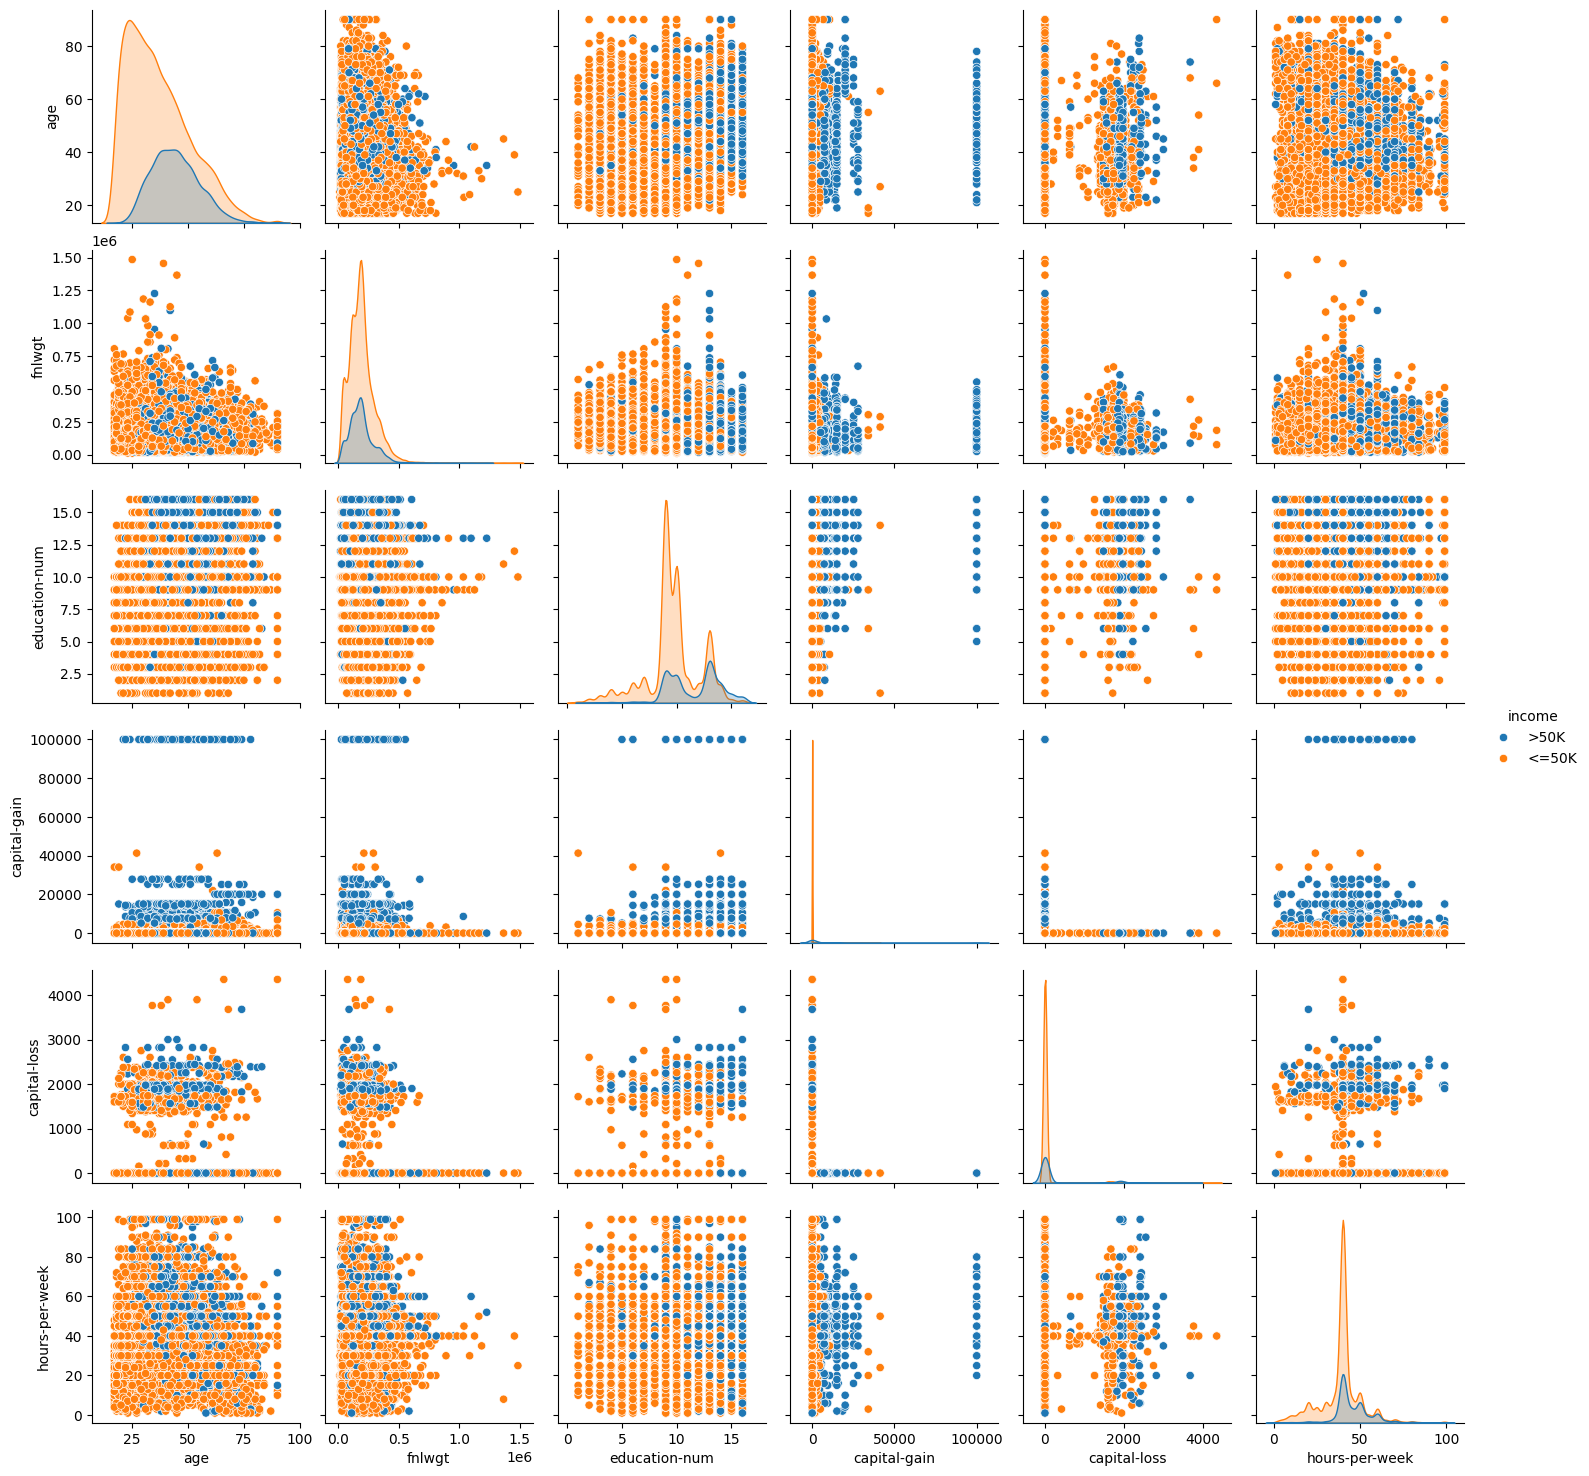

In [105]:
# Pairplot for all numeric columns and see how income affects the distributions
sns.pairplot(df, hue="income", vars=num_cols)
#sns.pairplot(df[num_cols + ["income"]], hue="income", palette="Set1")
plt.show()

In [106]:
# 3. Detect outliers with IQR
outliers = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    print(f"{col}: lower={lower_bound}, upper={upper_bound}, outliers={outliers[col]}")

age: lower=-2.0, upper=78.0, outliers=112
fnlwgt: lower=-60602.25, upper=415571.75, outliers=798
education-num: lower=4.5, upper=16.5, outliers=962
capital-gain: lower=0.0, upper=0.0, outliers=2139
capital-loss: lower=0.0, upper=0.0, outliers=1230
hours-per-week: lower=32.5, upper=52.5, outliers=7166


I'll do the analysis specifically for capital-gain, capital-loss, and hours-per-week (the most skewed features), and show the before/after effect of capping vs. removing outliers

In [107]:
import numpy as np

# Copy dataframe for transformation
df_log = df.copy()

# Apply log1p (log(1+x)) to handle zeros safely
log_features = ["capital-gain", "capital-loss", "hours-per-week"]
for col in log_features:
    df_log[col] = np.log1p(df_log[col])

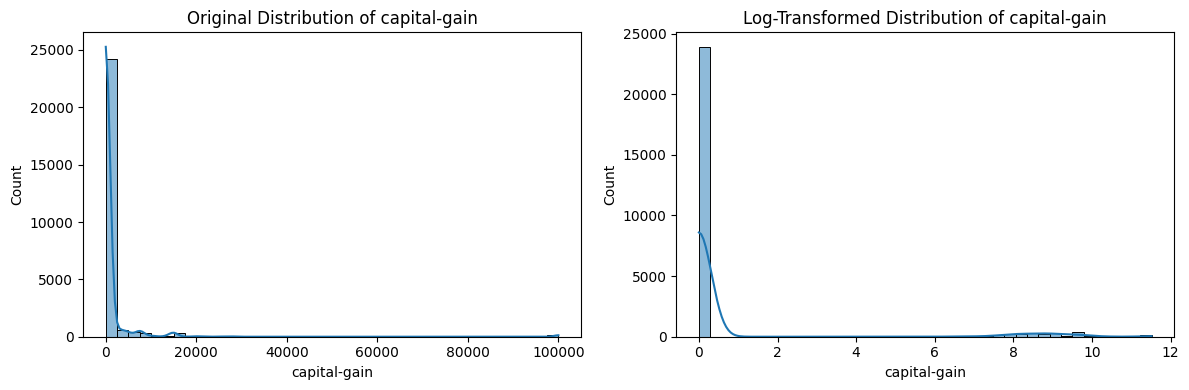

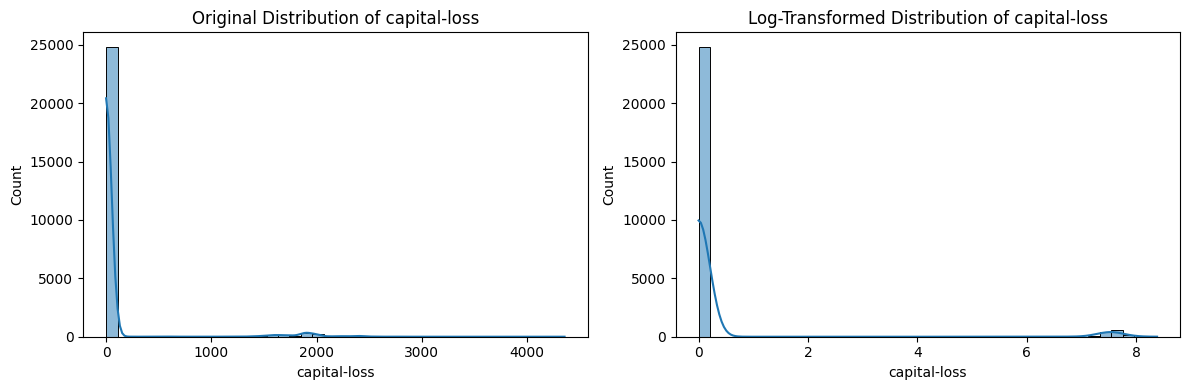

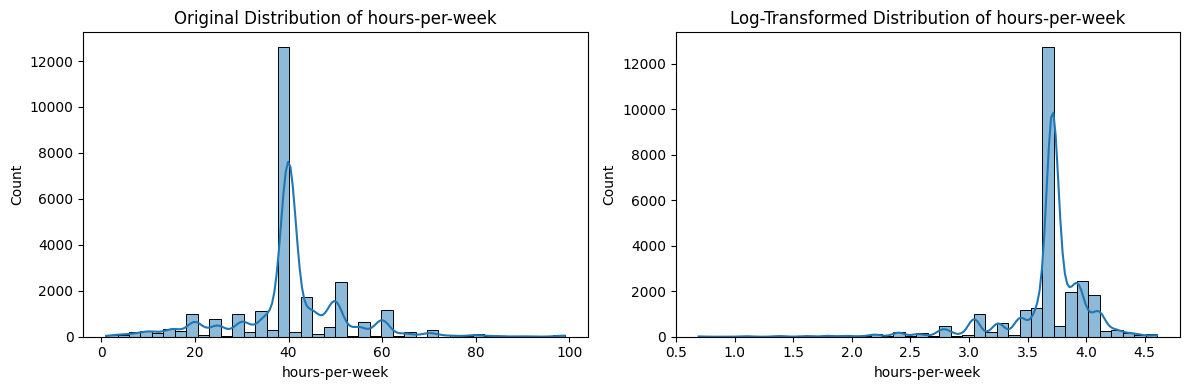

In [108]:
# Compare original vs log-transformed distributions
for col in log_features:
    plt.figure(figsize=(12,4))
    
    # Original
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=40)
    plt.title(f"Original Distribution of {col}")
    
    # Log-transformed
    plt.subplot(1,2,2)
    sns.histplot(df_log[col], kde=True, bins=40)
    plt.title(f"Log-Transformed Distribution of {col}")
    
    plt.tight_layout()
    plt.show()

In [109]:
df_log.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
5514,33,Local-gov,198183,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0.0,0.000000,3.931826,United-States,>50K
19777,36,Private,86459,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,7.543273,3.931826,United-States,>50K
10781,58,Self-emp-not-inc,203039,9th,5,Separated,Craft-repair,Not-in-family,White,Male,0.0,0.000000,3.713572,United-States,<=50K
32240,21,Private,180190,Assoc-voc,11,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.000000,3.850148,United-States,<=50K
9876,27,Private,279872,Some-college,10,Divorced,Other-service,Not-in-family,White,Male,0.0,0.000000,3.713572,United-States,<=50K


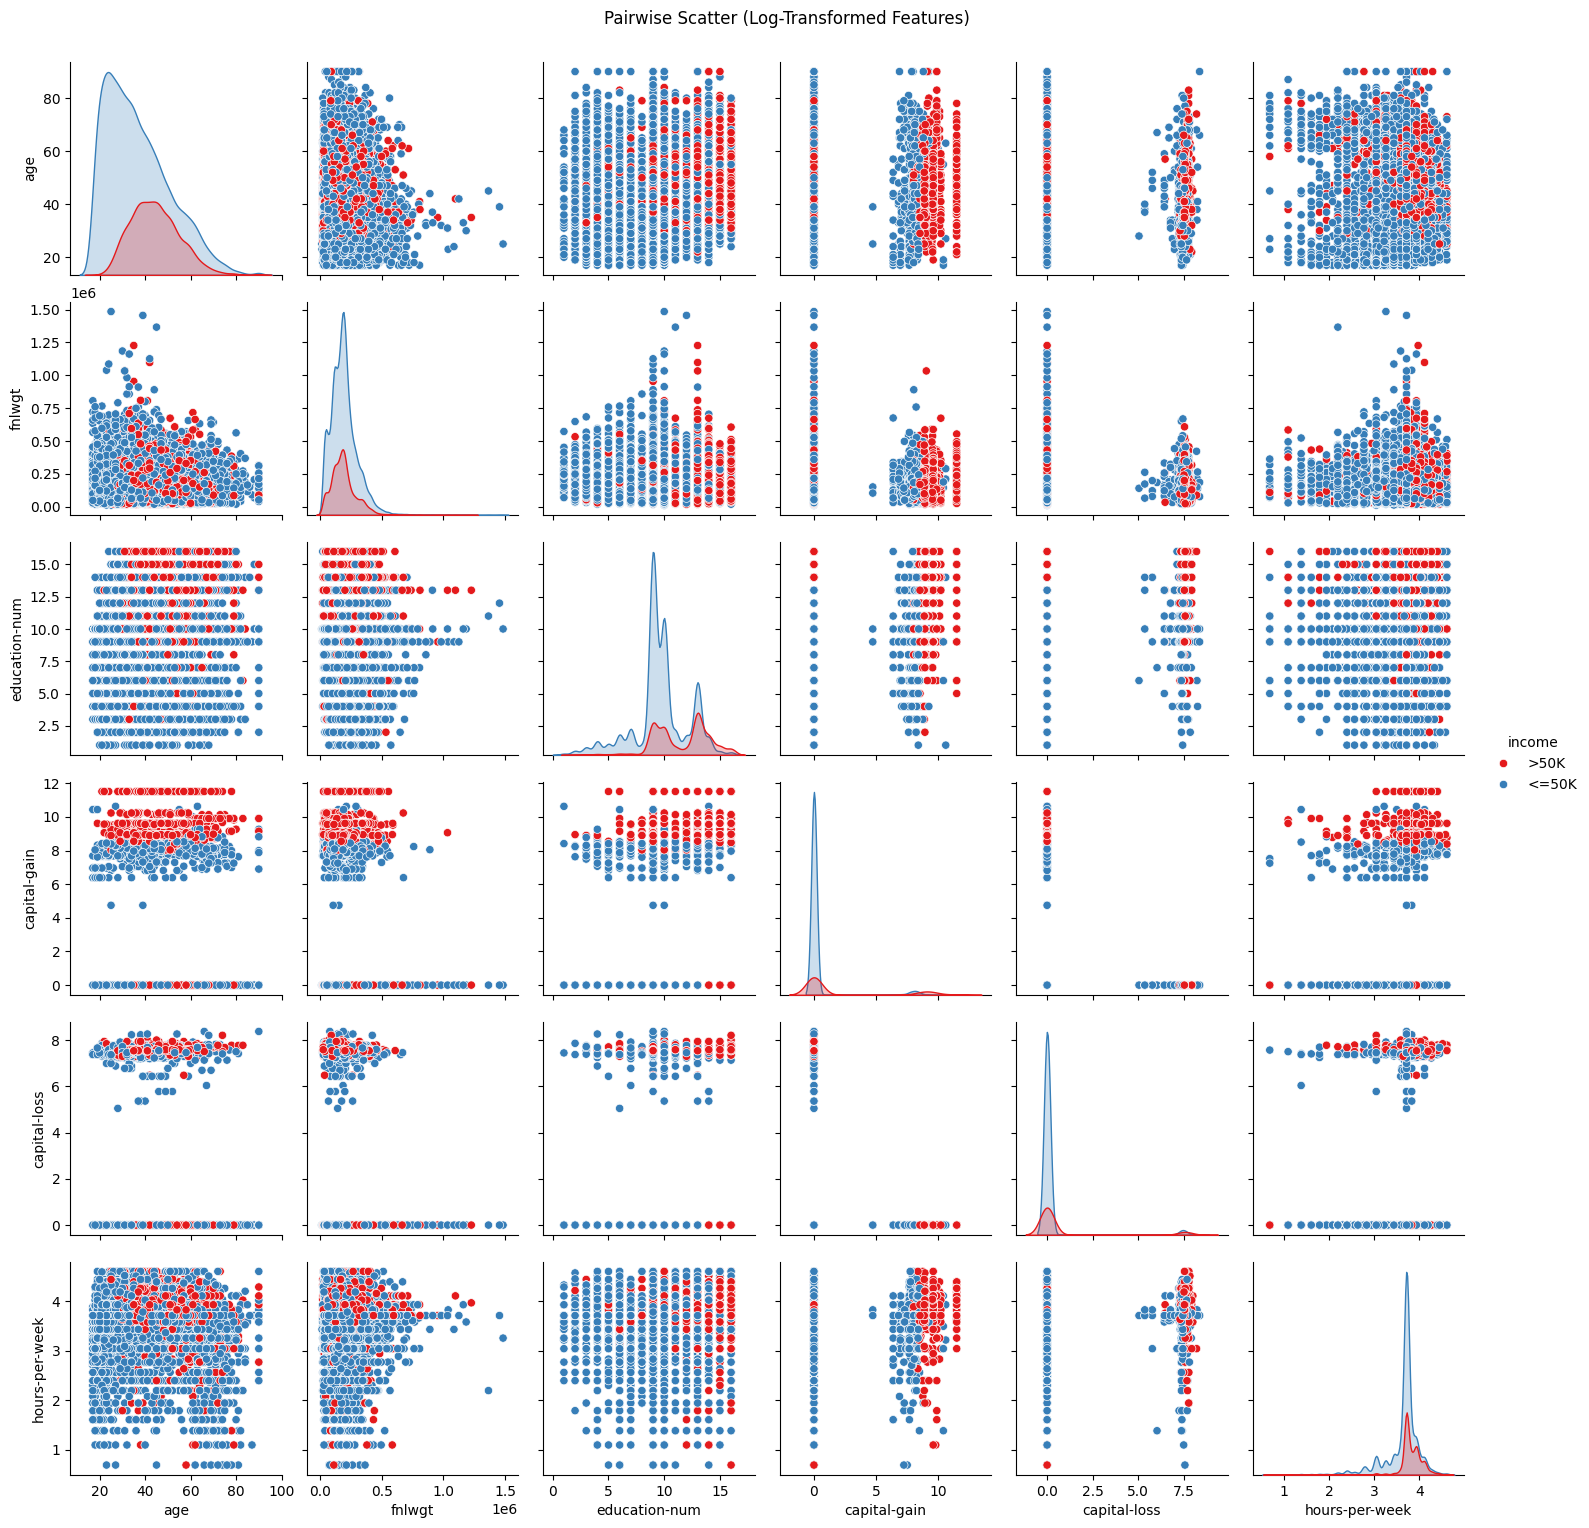

In [110]:
# Pairplot after log-transform (to check relationships)
sns.pairplot(df_log[num_cols + ["income"]], 
             hue="income", palette="Set1")
plt.suptitle("Pairwise Scatter (Log-Transformed Features)", y=1.02)
plt.show()

# Step 3. Handling Categorical Data
Find all the categorical features in the dataset.
Convert them into numeric form so they can be used in models.
Try both pd.get_dummies() and OneHotEncoder.
Reflect: which method would you use in production, and why?

I'll continue working with the log_transform df_log

In [111]:
df = df_log.copy()

In [112]:
print("Categorical features:", list(cat_cols))

Categorical features: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


Since the target variable is not included in the categorical features there's no need to exlude it

In [113]:
# One-hot encoding with pandas
df_dummies = pd.get_dummies(df, columns=cat_cols, drop_first=True)

'''
Expands each categorical feature into multiple binary columns.
drop_first=True avoids the dummy variable trap (collinearity).
'''

print("Shape after get_dummies:", df_dummies.shape)
df_dummies.head()

Shape after get_dummies: (26048, 98)


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
5514,33,198183,13,0.0,0.000000,3.931826,True,False,False,False,...,False,False,False,False,False,False,True,False,False,True
19777,36,86459,11,0.0,7.543273,3.931826,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
10781,58,203039,5,0.0,0.000000,3.713572,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
32240,21,180190,11,0.0,0.000000,3.850148,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
9876,27,279872,10,0.0,0.000000,3.713572,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False


In [114]:
# One-hot encoding with sklearn

from sklearn.preprocessing import OneHotEncoder

# create dataframe with categorical features only
df_cat = df[cat_cols]

# Initialize encoder
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

# Fit and transform
cat_encoded = encoder.fit_transform(df_cat)

# Create dataframe with encoded columns
encoded_cols = encoder.get_feature_names_out(cat_cols)
df_cat_encoded = pd.DataFrame(cat_encoded, columns=encoded_cols)
df_cat_encoded.head()

,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [115]:
# Concatenate back with original dataframe
df_encoded = pd.concat([df.drop(columns=cat_cols).reset_index(drop=True), df_cat_encoded.reset_index(drop=True)], axis=1)

Which to use in production?

pd.get_dummies()

(+) Easy, fast, works directly on Pandas DataFrames
(-) Not robust for production pipelines, because column mismatch can happen if new categories appear in unseen data.

OneHotEncoder

(+)Handles unseen categories (handle_unknown="ignore")(+)
(+)Fits naturally into sklearn Pipelines (scaling, encoding, modeling)(+)
(+)Ensures consistent preprocessing during training & prediction.
(-) Slightly more code than pd.get_dummies().

In production: I would prefer OneHotEncoder inside a pipeline, because it’s robust, scalable, and avoids mismatched columns between training and inference.

In [116]:
df = df_encoded.copy()
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
0,33,198183,13,0.0,0.000000,3.931826,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,36,86459,11,0.0,7.543273,3.931826,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,58,203039,5,0.0,0.000000,3.713572,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,21,180190,11,0.0,0.000000,3.850148,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,27,279872,10,0.0,0.000000,3.713572,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Step 4. Feature Scaling
Pick several numeric features.
Apply different scaling methods (Min-Max, Standardization).
Compare before and after.
Which method do you think is most appropriate here?

In [117]:
# pick numeric features
X_num = df[num_cols]
X_num.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,33,198183,13,0.0,0.000000,3.931826
1,36,86459,11,0.0,7.543273,3.931826
2,58,203039,5,0.0,0.000000,3.713572
3,21,180190,11,0.0,0.000000,3.850148
4,27,279872,10,0.0,0.000000,3.713572


In [118]:
# Original stats
print("Original Summary:\n", X_num.describe())

Original Summary:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  26048.000000  2.604800e+04   26048.000000  26048.000000  26048.000000   
mean      38.576513  1.897592e+05      10.080544      0.724823      0.354369   
std       13.642904  1.052329e+05       2.575202      2.440200      1.592805   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.179630e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.782635e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370065e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000     11.512925      8.379539   

       hours-per-week  
count    26048.000000  
mean         3.664161  
std          0.387220  
min          0.693147  
25%          3.713572  
50%          3.713572  
75%          3.828641  
max          4.605170  


In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-Max Scaling (0 to 1 range)
minmax_scaler = MinMaxScaler()
X_minmax = pd.DataFrame(minmax_scaler.fit_transform(X_num), columns=num_cols)

# Standardization (mean=0, std=1)
standard_scaler = StandardScaler()
X_standard = pd.DataFrame(standard_scaler.fit_transform(X_num), columns=num_cols)

print("\nMin-Max Summary:\n", X_minmax.describe())
print("\nStandardized Summary:\n", X_standard.describe())


Min-Max Summary:
                 age        fnlwgt  education-num  capital-gain  capital-loss  \
count  26048.000000  26048.000000   26048.000000  26048.000000  26048.000000   
mean       0.295569      0.120532       0.605370      0.062957      0.042290   
std        0.186889      0.071469       0.171680      0.211953      0.190083   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.150685      0.071772       0.533333      0.000000      0.000000   
50%        0.273973      0.112725       0.600000      0.000000      0.000000   
75%        0.424658      0.152621       0.733333      0.000000      0.000000   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

       hours-per-week  
count    26048.000000  
mean         0.759457  
std          0.098982  
min          0.000000  
25%          0.772088  
50%          0.772088  
75%          0.801502  
max          1.000000  

Standardized Summary:
                 age 

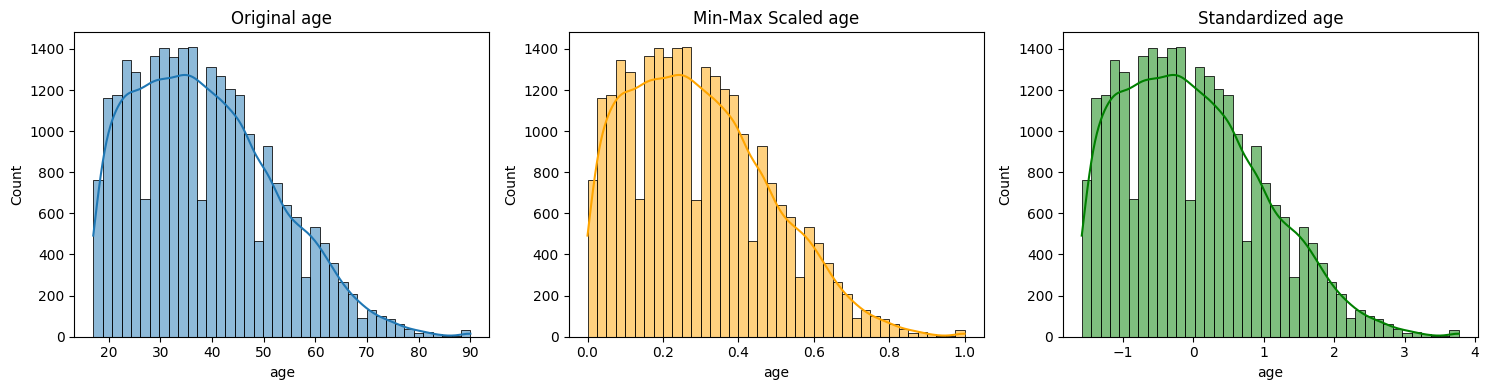

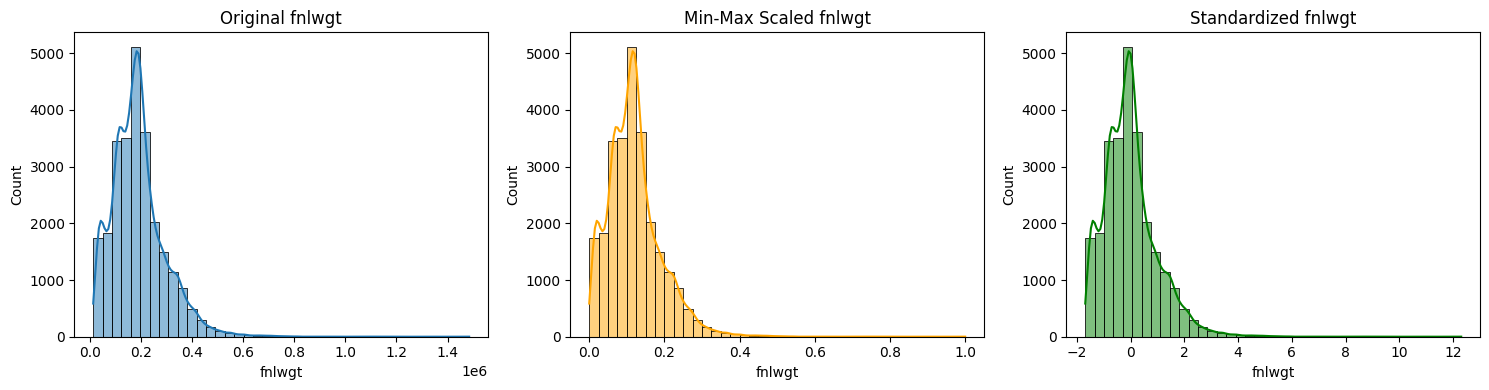

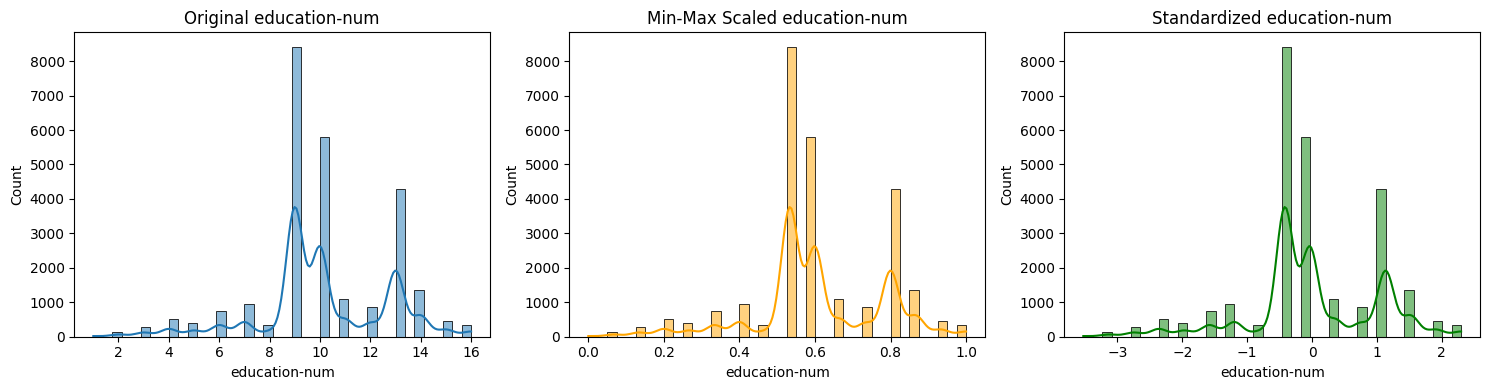

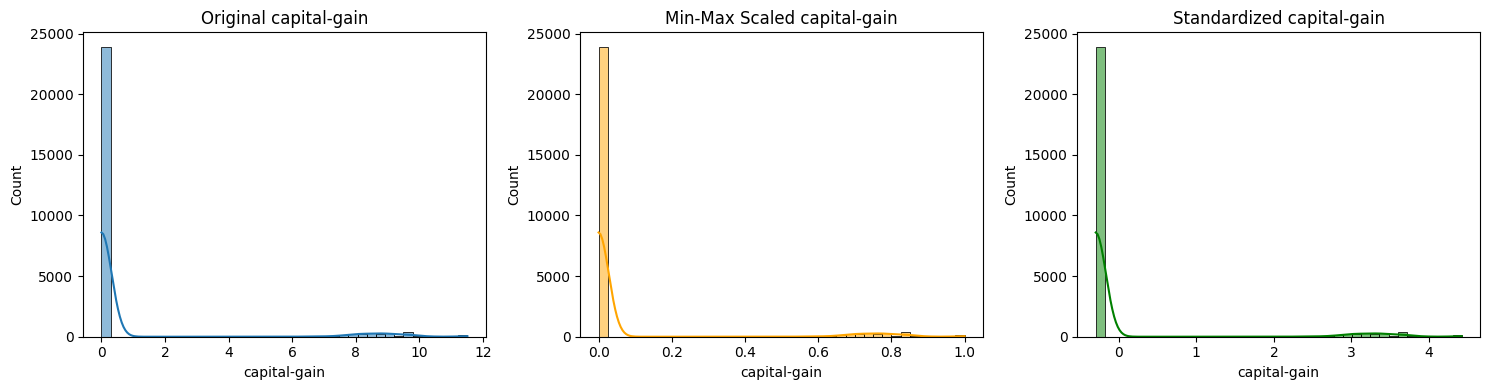

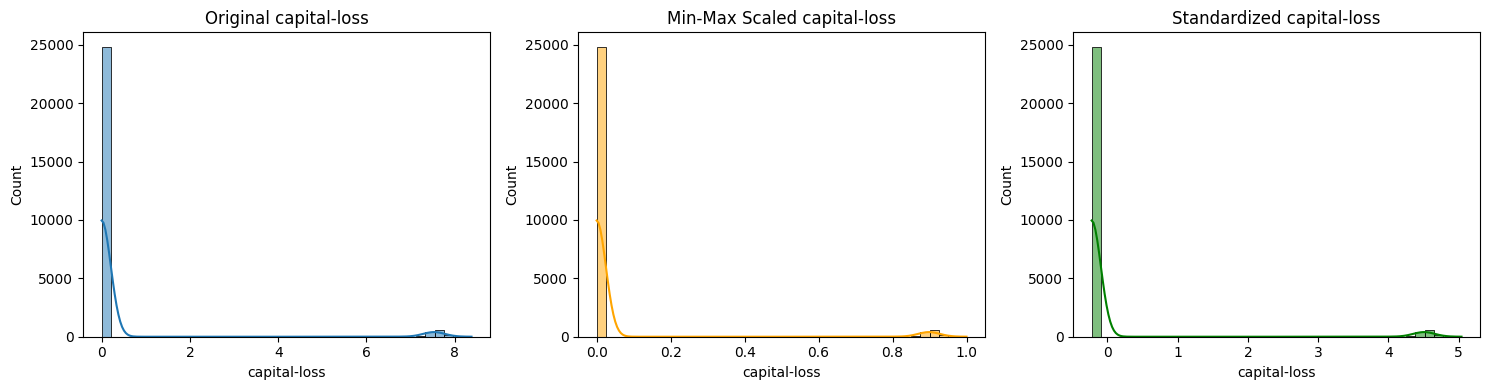

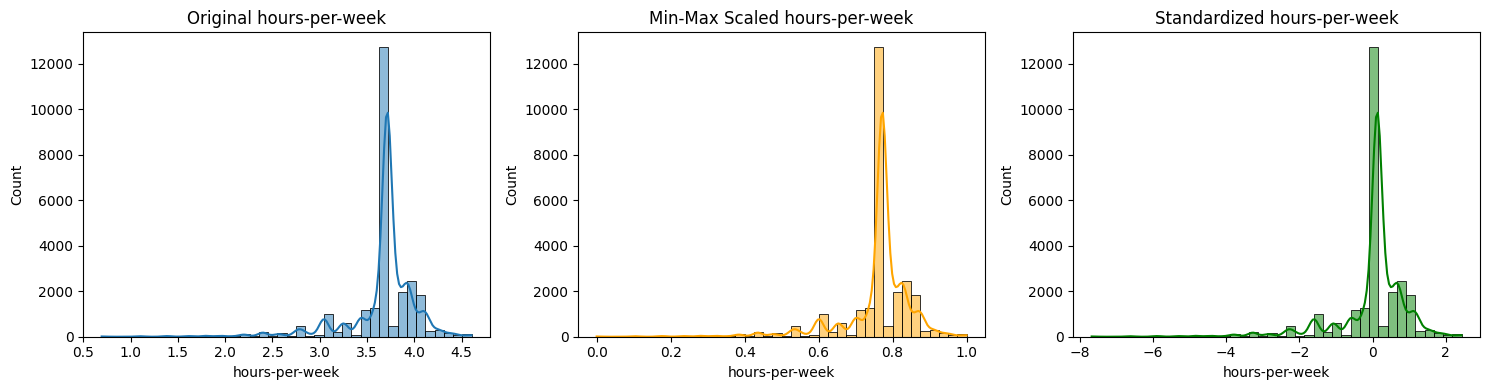

In [120]:
# Visual comparison with plots

import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,3,1)
    sns.histplot(X_num[col], kde=True, bins=40)
    plt.title(f"Original {col}")
    
    plt.subplot(1,3,2)
    sns.histplot(X_minmax[col], kde=True, bins=40, color="orange")
    plt.title(f"Min-Max Scaled {col}")
    
    plt.subplot(1,3,3)
    sns.histplot(X_standard[col], kde=True, bins=40, color="green")
    plt.title(f"Standardized {col}")
    
    plt.tight_layout()
    plt.show()


Reflection

Min-Max Scaling

* All values squeezed into [0,1].

* Preserves shape of distribution but compresses outliers.

* Good for algorithms using distance (e.g., KNN, Neural Nets).

Standardization (Z-score)

* Centered at 0, unit variance.

* Handles outliers better (doesn’t squash everything between 0 and 1).

* Preferred for linear models (Logistic Regression, SVM).

Which to use here?

Since we’re working with the Adult dataset and want to try models like Logistic Regression, Standardization is usually better because:

The numeric features (e.g., capital-gain, fnlwgt) have extreme outliers.

Standardization reduces their impact while still keeping useful variance.

For a tree-based model (Random Forest, XGBoost), scaling doesn’t matter — but for Logistic Regression, SVM, Neural Nets, I’d pick Standardization.

In [121]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Local-gov', 'workclass_Never-worked',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'workclass_Without-pay', 'education_11th', 'education_12th',
       'education_1st-4th', 'education_5th-6th', 'education_7th-8th',
       'education_9th', 'education_Assoc-acdm', 'education_Assoc-voc',
       'education_Bachelors', 'education_Doctorate', 'education_HS-grad',
       'education_Masters', 'education_Preschool', 'education_Prof-school',
       'education_Some-college', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',

In [122]:
# Concatenate back with original dataframe
df = pd.concat([df.drop(columns=num_cols).reset_index(drop=True), X_num.reset_index(drop=True)], axis=1)

# 5. Feature Engineering
Create at least two new features that could help predict income.
Think about combinations, transformations, or new groupings of existing variables.
Explain your reasoning: why might these new features help?

Approach: Group-level aggregates (sex-level statistics)

The column sex has two categories: "Male" and "Female".

From prior studies, gender is strongly correlated with income in this dataset.

Why: Captures the socio-economic baseline for each sex; individual deviation from that baseline can be informative.

In [123]:
# Interaction: sex × hours-per-week
'''
    Captures how work hours differ between men and women.
    Example: if men on average work longer hours in this dataset, this might predict higher income.
'''

df["male_hours"] = df["sex_Male"] * df["hours-per-week"]

In [124]:
# Interaction: sex × education-num
'''
    Captures whether education levels differ in predictive power between men and women.
'''
df["male_education"] = df["sex_Male"] * df["education-num"]


In [125]:
# concatenate the columns 'sex' and 'occupation' from the original train_df to df for feature engineering
df_feng = pd.concat([df, train_df[['sex', 'occupation']].reset_index(drop=True)], axis=1)
df_feng.columns

Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th',
       ...
       'age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'male_hours', 'male_education', 'sex', 'occupation'],
      dtype='object', length=102)

In [126]:
# Group-based feature: sex × occupation
'''
Creates categories like "Male_Exec-managerial", "Female_Exec-managerial".

This captures occupational segregation by gender, which influences income levels.
'''
df_feng["sex_occupation"] = df_feng["sex"] + "_" + df_feng["occupation"]
df_feng.columns

Index(['workclass_Local-gov', 'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay', 'education_11th',
       'education_12th', 'education_1st-4th',
       ...
       'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'male_hours', 'male_education', 'sex', 'occupation',
       'sex_occupation'],
      dtype='object', length=103)

In [127]:
# drop columns sex and occupation
df_feng.drop(columns=['sex', 'occupation'], inplace=True)

# create a copy of df_feng to avoid modifying the original dataframe df
df = df_feng.copy()

Why these features might help

is_male: Directly captures gender difference.

male_hours: Captures gendered work-hour differences (men working more → higher income).

male_education: Education may have different effects depending on sex.

sex_occupation: Certain jobs have gender disparities in pay.

By combining categorical (sex, occupation) and numeric (hours-per-week, education-num), we make interaction features that allow the model to learn complex relationships.

1. Which step was the most challenging, and why?

Probably Step 2 (Outlier handling).

The dataset has skewed distributions (capital-gain, capital-loss) with many zeros and extreme outliers.

Deciding whether to remove, cap, or transform isn’t trivial because those outliers aren’t necessarily “errors” but reflect real rare cases. This step requires judgment: removing them risks losing valuable information, while keeping them risks the model being affected by extreme values.

The challenge wasn’t technical, but conceptual; deciding how much of “reality” you keep vs how much you “clean”.

2. Which features do you expect to be the strongest predictors of income?

From domain knowledge and exploratory analysis:

Education level (education-num) more years of education strongly correlate with higher income.

Occupation some jobs (Exec-managerial, Prof-specialty) are much more predictive of high income.

Hours-per-week → people working longer hours are more likely to earn >50K.

Capital-gain / Capital-loss these are extremely predictive (high gains are strongly associated with high income).

Marital-status “Married-civ-spouse” tends to be associated with higher income in this dataset.

Sex (gender) due to socioeconomic factors, being male is predictive of higher income.

So the mix of education, work intensity, financial gains, and demographics seem most predictive.

3. Did handling outliers change your understanding of the dataset?

Yes

Before handling, capital-gain and capital-loss looked meaningless; mostly zeros.

After handling outliers it became clear that a small group of individuals with non-zero capital gains/losses are much wealthier, which is a strong predictor of income.

Similarly, for hours-per-week, we saw that working >60 hours/week is rare, but those individuals are more often high earners.

Handling outliers revealed that these extreme values aren’t “noise”; they’re signals of high-income individuals.

Outlier handling showed me that instead of throwing them away, it’s often better to transform them so they contribute meaningfully to the model.